In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scripts import load, utils

In [4]:
## helper function to estimate systematic errors by loading multiple extrapolations
def load_many_extrap(what, **kwargs):
    from copy import deepcopy
    all_extraps = []
    all_extraps.append(utils.Extrapolation('variance', deg=2, num_points=6))
    all_extraps.append(utils.Extrapolation('truncation', deg=2, num_points=6))
    all_extraps.append(utils.Extrapolation('bonddim', deg=2, num_points=6))
    
    extraps_raw = []
    for bond_dim in all_extraps:
        parms = deepcopy(kwargs)
        parms['bond_dim'] = bond_dim
        d, props = load.result(what, **parms)
        extraps_raw.append(d)
    
    extraps = np.column_stack([er[:,1] for er in extraps_raw])
    dd = np.empty((extraps.shape[0], 4))
    dd[:,0] = extraps_raw[0][:,0]
    dd[:,1] = np.mean(extraps[:,0:], axis=1)
    dd[:,2] = np.min(extraps[:,0:], axis=1)
    dd[:,3] = np.max(extraps[:,0:], axis=1)
    return dd, props

## Fig 3 : Local density for several $M$

# Discard L=128, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=0.000342441878925
# Discard L=128, n=0.875, tperp=1.0, M=1600 : middle density not symmetry, delta=9.85828687521e-05
# Discard L=128, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=0.000342441878925
# Discard L=128, n=0.875, tperp=1.0, M=1600 : middle density not symmetry, delta=9.85828687521e-05
# Discard L=128, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=0.000342441878925
# Discard L=128, n=0.875, tperp=1.0, M=1600 : middle density not symmetry, delta=9.85828687521e-05


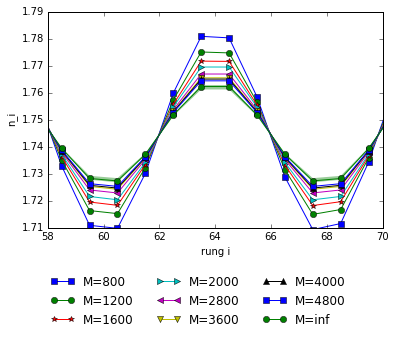

In [5]:
L = 128
filling = 0.875

bond_dims = []
bond_dims.append(800)
bond_dims.append(1200)
bond_dims.append(1600)
bond_dims.append(2000)
bond_dims.append(2800)
bond_dims.append(3600)
bond_dims.append(4000)
bond_dims.append(4800)

markers = 'so*><v^'

figure(figsize=(6,5))
subplots_adjust(bottom=.3)
for i,bond_dim in enumerate(bond_dims):

    d, props = load.result('density', L=L, filling=filling, bond_dim=bond_dim)
    plot(d[:,0], d[:,1], '-' + markers[i%(len(markers))], label='M={}'.format(bond_dim))

d, props = load_many_extrap('density', L=L, filling=filling)
line, = plot(d[:,0], d[:,1], '-' + markers[len(bond_dims)%(len(markers))], label='M=inf')
fill_between(d[:,0], d[:,2], d[:,3], edgecolor='none', facecolor=line.get_color(), alpha=.4)

xlim(58,70)
ylim(1.71,1.79)
handles, labels = gca().get_legend_handles_labels()
figlegend(handles, labels, loc='lower center', frameon=False, ncol=3, )
xlabel('rung i')
ylabel('n_i')

## Fig 6a) : Density extrapolation

# Discard L=128, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=0.000342441878925
# Discard L=128, n=0.875, tperp=1.0, M=1600 : middle density not symmetry, delta=9.85828687521e-05
# Discard L=128, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=0.000342441878925
# Discard L=128, n=0.875, tperp=1.0, M=1600 : middle density not symmetry, delta=9.85828687521e-05
# Discard L=128, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=0.000342441878925
# Discard L=128, n=0.875, tperp=1.0, M=1600 : middle density not symmetry, delta=9.85828687521e-05
# Discard L=128, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=0.000342441878925
# Discard L=128, n=0.875, tperp=1.0, M=1600 : middle density not symmetry, delta=9.85828687521e-05
# Discard L=128, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=0.000342441878925
# Discard L=128, n=0.875, tperp=1.0, M=1600 : middle density not symmetry, delta=9.85828687521e-05
# Discard 

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:26: DeprecationWarning: numpy boolean negative (the unary `-` operator) is deprecated, use the bitwise_xor (the `^` operator) or the logical_xor function instead.


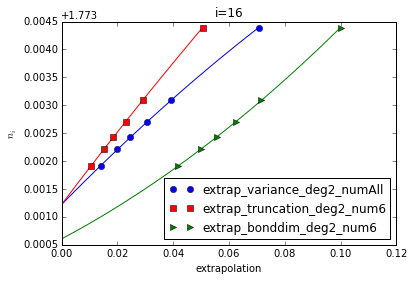

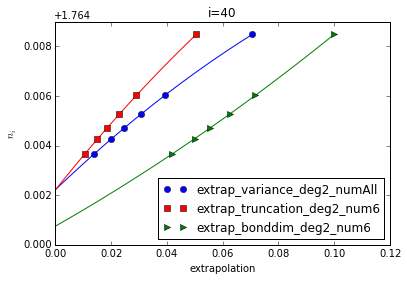

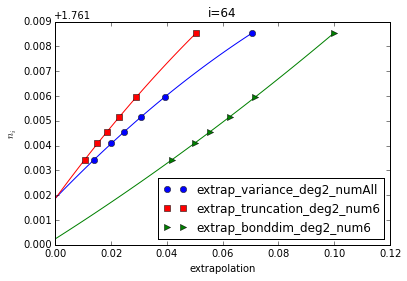

In [6]:
L = 128
filling = 0.875

all_extraps = []
all_extraps.append((1., utils.Extrapolation('variance', deg=2, num_points=None)))
all_extraps.append((1e4, utils.Extrapolation('truncation', deg=2, num_points=6)))
all_extraps.append((200, utils.Extrapolation('bonddim', deg=2, num_points=6)))

markers = 'os>v*'
colors  = 'brgk' 

for at_x in [16,40,64]:
    figure()
    for i,(scale_factor,bond_dim) in enumerate(all_extraps):
        d, props = load.extrapolation('density', L=L, filling=filling, bond_dim=bond_dim, at_x=at_x)

        fit_coeff = props['fitted_coeff']
        xfit = linspace(0,max(d[:,0]))
        yfit = polyval(fit_coeff, xfit)

        sel = np.ones(len(xfit), dtype=bool)
        if 'fit_cut' in props:
            fit_cut = float(props['fit_cut'])
            sel = xfit <= fit_cut        
        plot(scale_factor*xfit[sel], yfit[sel], '-', color=colors[i])
        plot(scale_factor*xfit[-sel], yfit[-sel], '--', color=colors[i])
        
        plot(scale_factor*d[:,0], d[:,1], markers[i], color=colors[i], label=str(bond_dim))
    legend(loc='best')
    title('i={}'.format(at_x))
    xlabel('extrapolation')
    ylabel('$n_i$')

## Fig 7a) : Density fit

# Discard L=128, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=0.000342441878925
# Discard L=128, n=0.875, tperp=1.0, M=1600 : middle density not symmetry, delta=9.85828687521e-05
# Discard L=128, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=0.000342441878925
# Discard L=128, n=0.875, tperp=1.0, M=1600 : middle density not symmetry, delta=9.85828687521e-05
## FIT `fit_func` ##
# L      : 128.0
# fill   : 0.875
# nholes : 16.0
K_rho : 1.01861130862
-- n0 : 1.74516791994
-- A : 0.179719858965
-- alpha : 0.50930565431


scripts/pyalps_dset/fit_wrapper.py:34: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if x == None: x = np.arange(y.shape[0])
scripts/density.py:139: RuntimeWarning: invalid value encountered in power
  return A * np.cos(2*np.pi*kk*x + shift) / ((2*L_eff/np.pi) * np.sin(np.pi*x/L_eff + shift2))**alpha + n0


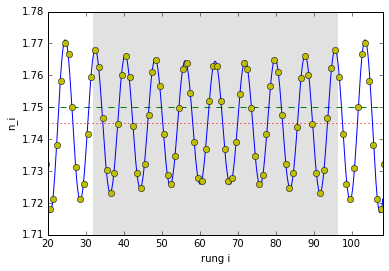

In [7]:
L = 128
filling = 0.875
bond_dim = utils.Extrapolation('variance', deg=2, num_points=6)

figure()

d, props = load.result('density', L=L, filling=filling, bond_dim=bond_dim)
dfit, props_fit = load.result('density_fit', L=L, filling=filling, bond_dim=bond_dim)

n0 = props_fit['density_fitted_n0']
xfit = dfit[:,0]

fit_sel = props_fit['density_fit_sel']
fill([fit_sel[0], fit_sel[1], fit_sel[1], fit_sel[0]], [0,0,2,2], color=(225/255., 225/255., 225/255.))

plot(xfit, xfit*0+n0, ':r') # background density
plot(xfit, xfit*0+filling*2, '--g') # averange filling
plot(dfit[:,0], dfit[:,1], '-b')
plot(d[:,0], d[:,1], 'oy')

ylim(1.71,1.78)
xlim(20,108)
xlabel('rung i')
ylabel('n_i')

## Fig 7b) : Density fit, odd length

# Discard L=129, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=0.000127858638748
# Discard L=129, n=0.875, tperp=1.0, M=1600 : middle density not symmetry, delta=0.000168321744678
# Discard L=129, n=0.875, tperp=1.0, M=2000 : middle density not symmetry, delta=5.01595806515e-05
# Discard L=129, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=0.000127858638748
# Discard L=129, n=0.875, tperp=1.0, M=1600 : middle density not symmetry, delta=0.000168321744678
# Discard L=129, n=0.875, tperp=1.0, M=2000 : middle density not symmetry, delta=5.01595806515e-05
## FIT `fit_func` ##
# L      : 129.0
# fill   : 0.875
# nholes : 16.0
K_rho : 0.978264504505
-- n0 : 1.74710728608
-- A : -0.165350950424
-- alpha : 0.489132252252


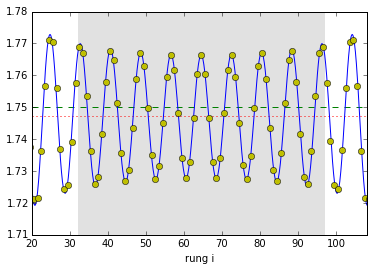

In [8]:
L = 129
filling = 0.875
bond_dim = utils.Extrapolation('variance', deg=2, num_points=6)

figure()

d, props = load.result('density', L=L, filling=filling, bond_dim=bond_dim)
dfit, props_fit = load.result('density_fit', L=L, filling=filling, bond_dim=bond_dim)

n0 = props_fit['density_fitted_n0']
xfit = dfit[:,0]

fit_sel = props_fit['density_fit_sel']
fill([fit_sel[0], fit_sel[1], fit_sel[1], fit_sel[0]], [0,0,2,2], color=(225/255., 225/255., 225/255.))

plot(xfit, xfit*0+n0, ':r') # background density
plot(xfit, xfit*0+filling*2, '--g') # averange filling
plot(dfit[:,0], dfit[:,1], '-b')
plot(d[:,0], d[:,1], 'oy')

ylim(1.71,1.78)
xlim(20,108)
xlabel('rung i')


## Fig. 7c) : Fit of Friedel oscillations

## FIT `fit_func` ##
# L      : 32.0
# fill   : 0.875
# nholes : 4.0
K_rho : 1.22883789228
-- n0 : 1.73198434645
-- A : 0.234587286601
-- alpha : 0.614418946138
## FIT `fit_func` ##
# L      : 48.0
# fill   : 0.875
# nholes : 6.0
K_rho : 0.944408411921
-- n0 : 1.73702835556
-- A : 0.154983655918
-- alpha : 0.472204205961
# Discard L=64, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=6.06578743847e-05
## FIT `fit_func` ##
# L      : 64.0
# fill   : 0.875
# nholes : 8.0
K_rho : 1.01635576101
-- n0 : 1.74055760719
-- A : 0.175677117644
-- alpha : 0.508177880507
# Discard L=80, n=0.875, tperp=1.0, M=1600 : middle density not symmetry, delta=7.58018820748e-05
## FIT `fit_func` ##
# L      : 80.0
# fill   : 0.875
# nholes : 10.0
K_rho : 1.04308127637
-- n0 : 1.74204405451
-- A : 0.186056058519
-- alpha : 0.521540638185
# Discard L=96, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=5.41602952064e-05
## FIT `fit_func` ##
# L      : 96.0
# fill   : 0.875
# nhol

scripts/density.py:139: RuntimeWarning: invalid value encountered in sqrt
  return A * np.cos(2*np.pi*kk*x + shift) / ((2*L_eff/np.pi) * np.sin(np.pi*x/L_eff + shift2))**alpha + n0
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/optimize/minpack.py:421: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)



# L      : 32.0
# fill   : 0.9375
# nholes : 2.0
K_rho : -2.07704625778
-- n0 : 1.837844537
-- A : 0.00277158780668
-- alpha : -1.03852312889
## FIT `fit_func` ##
# L      : 48.0
# fill   : 0.916666666667
# nholes : 3.0
K_rho : -2.28948953578
-- n0 : 1.86271370437
-- A : -0.000891264574556
-- alpha : -1.14474476789
## FIT `fit_func` ##
# L      : 64.0
# fill   : 0.9375
# nholes : 4.0
K_rho : 0.921179505132
-- n0 : 1.86369364261
-- A : 0.16738527464
-- alpha : 0.460589752566
# Discard L=80, n=0.925, tperp=1.0, M=1200 : middle density not symmetry, delta=5.68333242994e-05
## FIT `fit_func` ##
# L      : 80.0
# fill   : 0.925
# nholes : 5.0
K_rho : -0.987740911604
-- n0 : 1.86417665713
-- A : -0.00402846772517
-- alpha : -0.493870455802
## FIT `fit_func` ##
# L      : 96.0
# fill   : 0.9375
# nholes : 6.0
K_rho : 1.17055405725
-- n0 : 1.86478292415
-- A : 0.24992373255
-- alpha : 0.585277028627
# Discard L=128, n=0.9375, tperp=1.0, M=1200 : middle density not symmetry, delta=0.0001982576

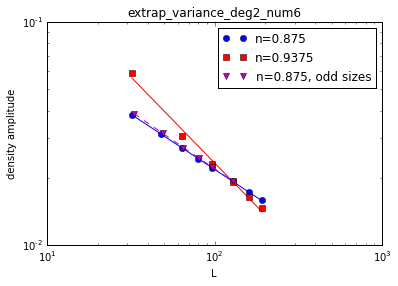

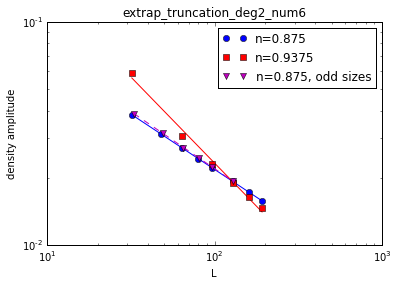

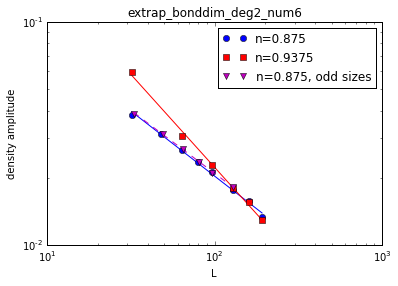

In [9]:
all_extraps = []
all_extraps.append(utils.Extrapolation('variance', deg=2, num_points=6))
all_extraps.append(utils.Extrapolation('truncation', deg=2, num_points=6))
all_extraps.append(utils.Extrapolation('bonddim', deg=2, num_points=6))

colors = 'brmc'
markers = 'osv'

for bond_dim in all_extraps:
    figure()
    ## Even system sizes
    for i, filling in enumerate([0.875, 0.9375]):
        d, props = load.result('density_amplitudes', filling=filling, bond_dim=bond_dim)

        fit_coeff = props['fitted_coeff']
        xfit = linspace(min(d[:,0]), max(d[:,0]))
        yfit = exp(polyval(fit_coeff, log(xfit)))

        c = colors[i]
        m = markers[i]

        plot(xfit, yfit, '-'+c)
        plot(d[:,0], d[:,1], m+c, label='n={}'.format(filling))

    ## Odd system sizes
    for i, filling in enumerate([0.875],start=2):
        d, props = load.result('density_amplitudes', filling=filling, bond_dim=bond_dim, odd_sizes=True)

        fit_coeff = props['fitted_coeff']
        xfit = linspace(min(d[:,0]), max(d[:,0]))
        yfit = exp(polyval(fit_coeff, log(xfit)))

        c = colors[i]
        m = markers[i]

        plot(xfit, yfit, '--'+c)
        plot(d[:,0], d[:,1], m+c, label='n={}, odd sizes'.format(filling))
    
    xscale('log')
    yscale('log')

    title(str(bond_dim))
    legend(loc='best')
    xlabel('L')
    ylabel('density amplitude')

## Fig. 10 : Fit of Friedel oscillations

## FIT `fit_func` ##
# L      : 32.0
# fill   : 0.9375
# nholes : 1.0
K_rho : -0.339231338363
-- n0 : 1.93571883609
-- A : -0.0424571366725
-- alpha : -0.169615669182
Data not found for L=48, n=0.96875, M=extrap_variance_deg2_num6
## FIT `fit_func` ##
# L      : 64.0
# fill   : 0.96875
# nholes : 2.0
K_rho : -2.95624808044
-- n0 : 1.91501669897
-- A : 0.000138029466492
-- alpha : -1.47812404022
Data not found for L=80, n=0.96875, M=extrap_variance_deg2_num6
PROBLEM: Failed to fit.
## FIT `fit_func` ##
# L      : 96.0
# fill   : 0.958333333333
# nholes : 3.0
K_rho : 1.0
-- n0 : 0.03125
-- A : 1.0
-- alpha : 0.5
# Discard L=128, n=0.96875, tperp=1.0, M=1200 : middle density not symmetry, delta=0.00129310249938
# Discard L=128, n=0.96875, tperp=1.0, M=1600 : middle density not symmetry, delta=0.000144364999007
# Discard L=128, n=0.96875, tperp=1.0, M=2000 : middle density not symmetry, delta=0.000576815380084
## FIT `fit_func` ##
# L      : 128.0
# fill   : 0.96875
# nholes : 4.0
K_rho : 

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: numpy boolean negative (the unary `-` operator) is deprecated, use the bitwise_xor (the `^` operator) or the logical_xor function instead.


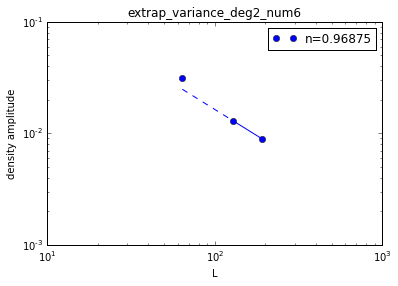

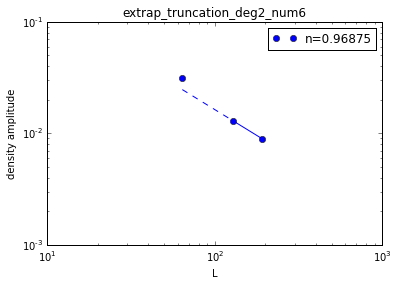

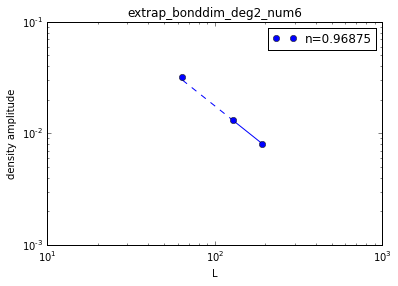

In [11]:
all_extraps = []
all_extraps.append(utils.Extrapolation('variance', deg=2, num_points=6))
all_extraps.append(utils.Extrapolation('truncation', deg=2, num_points=6))
all_extraps.append(utils.Extrapolation('bonddim', deg=2, num_points=6))

colors = 'brmc'
markers = 'osv'

filling = 0.96875 
i = 0
for bond_dim in all_extraps:
    figure()
    ## Use only the last two points in the fit
    d, props = load.result('density_amplitudes', filling=filling, bond_dim=bond_dim, amplitude_points=2)

    fit_coeff = props['fitted_coeff']
    xfit = linspace(min(d[:,0]), max(d[:,0]))
    yfit = exp(polyval(fit_coeff, log(xfit)))
    
    fit_range = props['fit_range']
    sel = np.all([xfit >= fit_range[0], xfit <= fit_range[1]], axis=0)
    
    c = colors[i]
    m = markers[i]
    
    plot(xfit[sel], yfit[sel], '-'+c)
    plot(xfit[-sel], yfit[-sel], '--'+c)
    plot(d[:,0], d[:,1], m+c, label='n={}'.format(filling))

    xscale('log')
    yscale('log')

    title(str(bond_dim))
    legend(loc='best')
    xlabel('L')
    ylabel('density amplitude')